## Import Packages

In [3]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## A Simple Cost Function
### $f(x) = x^2 + x + 1$

In [4]:
def cf(x):
    return x**2 + x + 1

In [5]:
# Make Data
x1 = np.linspace(start=-3, stop=3, num=500)

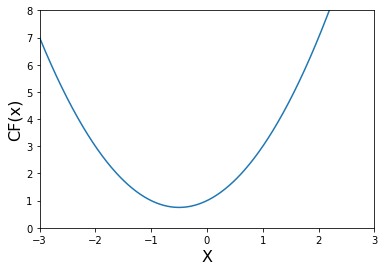

In [6]:
#Plot
plt.xlim([-3, 3])
plt.ylim(0, 8)
plt.xlabel("X", fontsize=16)
plt.ylabel("CF(x)", fontsize=16)
plt.plot(x1, cf(x1))
plt.show()

## Slope & Derivatives
$d/dx * x^n = n * x^(n-1)$

In [7]:
def df(x):
    return 2*x + 1

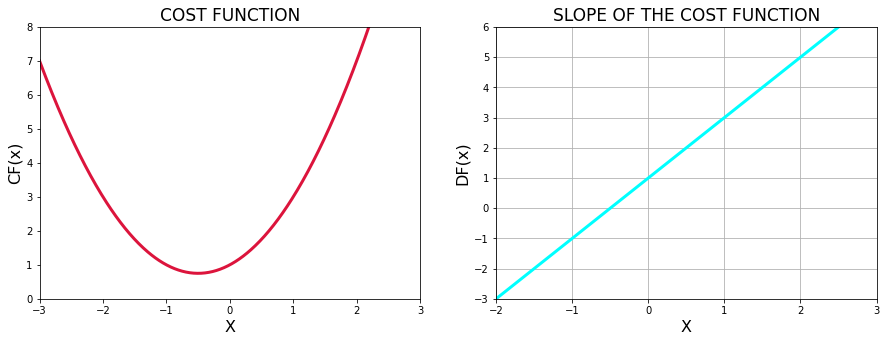

In [16]:
#Plot Derivatives
plt.figure(figsize=[15, 5])

#1st chart: cost function
plt.subplot(1,2,1)
plt.xlim([-3, 3])
plt.ylim(0, 8)
plt.title("COST FUNCTION", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("CF(x)", fontsize=16)
plt.plot(x1, cf(x1), color="crimson", linewidth=3)

#2nd chart: Derivatives
plt.subplot(1,2,2)
plt.xlim([-2, 3])
plt.ylim(-3, 6)
plt.grid()
plt.title("SLOPE OF THE COST FUNCTION", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("DF(x)", fontsize=16)
plt.plot(x1, df(x1), color="cyan", linewidth=3)

plt.show()

## Loops & Gradient Descent


In [33]:
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.0001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    step_size = abs(new_x - previous_x)
    
    if step_size < precision:
        print("loop time: ", n)
        break
print("Local min: ", new_x)
print("slope or df(x) value: ", df(new_x))
print("cost function or cf(x) value: ", cf(new_x))

loop time:  40
Local min:  -0.49962781616118024
slope or df(x) value:  0.0007443676776395236
cost function or cf(x) value:  0.7500001385208099


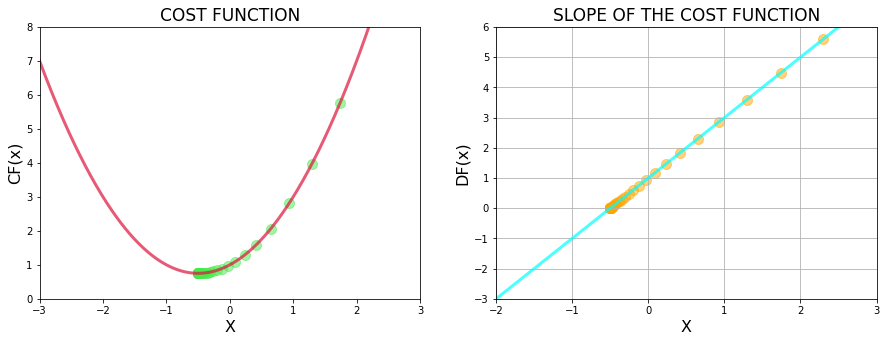

In [47]:
#Plot Derivatives
plt.figure(figsize=[15, 5])

#3rd chart: cost function
plt.subplot(1,2,1)
plt.xlim([-3, 3])
plt.ylim(0, 8)
plt.title("COST FUNCTION", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("CF(x)", fontsize=16)
plt.plot(x1, cf(x1), color="crimson", linewidth=3, alpha=0.7)

values = np.array(x_list)
plt.scatter(x_list, cf(values), color="#47ea4c", s=100, alpha=0.5)

#4th chart: Derivatives
plt.subplot(1,2,2)
plt.xlim([-2, 3])
plt.ylim(-3, 6)
plt.grid()
plt.title("SLOPE OF THE COST FUNCTION", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("DF(x)", fontsize=16)
plt.plot(x1, df(x1), color="cyan", linewidth=3, alpha=0.7)
plt.scatter(x_list, slope_list, color="orange", s=100, alpha=0.5)

plt.show()

## Multiple Minima, Initial Guess & Advance Function
### $$ g(x) = x^4 - 4x^2 + 5 $$

In [58]:
# make some data
x2 = np.linspace(-2, 2, 1000)

def g(x):
    return x ** 4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

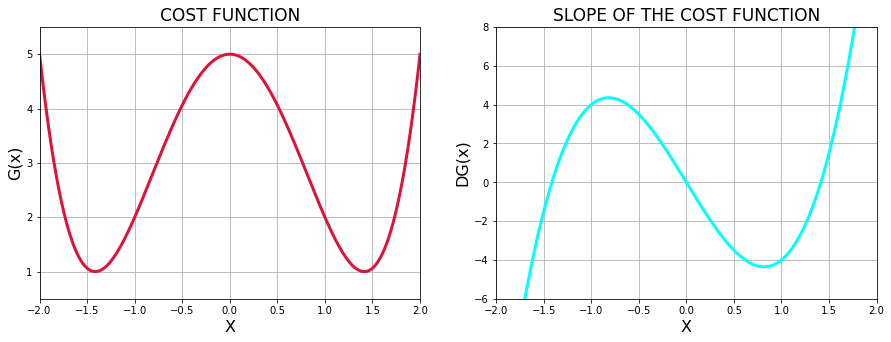

In [60]:
#Plot Derivatives
plt.figure(figsize=[15, 5])

#5th chart: cost function
plt.subplot(1,2,1)
plt.xlim([-2, 2])
plt.ylim(0.5, 5.5)
plt.grid()
plt.title("COST FUNCTION", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("G(x)", fontsize=16)
plt.plot(x2, g(x2), color="crimson", linewidth=3)

#6th chart: Derivatives
plt.subplot(1,2,2)
plt.xlim([-2, 2])
plt.ylim(-6, 8)
plt.grid()
plt.title("SLOPE OF THE COST FUNCTION", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("DG(x)", fontsize=16)
plt.plot(x2, dg(x2), color="cyan", linewidth=3)

plt.show()

## Gradient descent Py function

In [70]:
def gradient_descent(derivitave_func, initial_guess, multiplier=0.02, precision=0.001):  
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivitave_func(new_x)]

    for n in range(500):
        previous_x = new_x
        gradient = derivitave_func(previous_x)
        new_x = previous_x - multiplier * gradient

        x_list.append(new_x)
        slope_list.append(derivitave_func(new_x))

        step_size = abs(new_x - previous_x)

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [86]:
local_min, list_x, deriv_list = gradient_descent(dg, 2.5, precision=0.0001)
print("Local min: ", local_min)
print("Number of steps: ", len(list_x))
print("slope or df(x) value: ", df(local_min))
print("cost function or cf(x) value: ", cf(local_min))

Local min:  1.414375468989786
Number of steps:  20
slope or df(x) value:  3.828750937979572
cost function or cf(x) value:  4.414833436269864


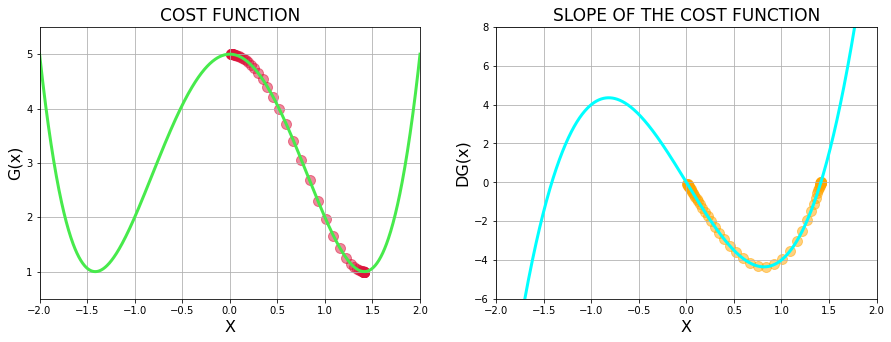

In [84]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.01, precision=0.0001)
#Plot Derivatives
plt.figure(figsize=[15, 5])

#7th chart: cost function
plt.subplot(1,2,1)
plt.xlim([-2, 2])
plt.ylim(0.5, 5.5)
plt.grid()
plt.title("COST FUNCTION", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("G(x)", fontsize=16)
plt.plot(x2, g(x2), color="#47ea4c", linewidth=3)
plt.scatter(list_x, g(np.array(list_x)), color="crimson", s=100, alpha=0.5)


#8th chart: Derivatives
plt.subplot(1,2,2)
plt.xlim([-2, 2])
plt.ylim(-6, 8)
plt.grid()
plt.title("SLOPE OF THE COST FUNCTION", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("DG(x)", fontsize=16)
plt.plot(x2, dg(x2), color="cyan", linewidth=3)
plt.scatter(list_x, deriv_list, color="orange", s=100, alpha=0.5)

plt.show()